In [1]:
from coronavirus_analyzer import CoronavirusAnalyzer
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
last_date = '2020-02-14'
analyzer = CoronavirusAnalyzer(last_date, first_date='2020-01-17')

2020-02-15 17:55:34,643 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.


In [3]:
for n in range(1, 11):
    df = analyzer.get_df_move_inc_corr(n=n).iloc[:, 0::3]
    print(n, df.mean().mean())

1 0.8538738056111977
2 0.8273419364527492
3 0.8181336438789362
4 0.8168921711490778
5 0.8094114238982023
6 0.8064436296983559
7 0.8015810079664407
8 0.7986748920824623
9 0.794993861577882
10 0.7911936278779181


corr: -0.042211187925772366


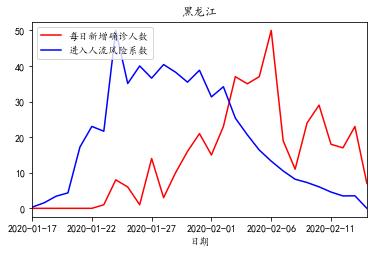

In [4]:
analyzer.plot_move_inc_corr('黑龙江', '2020-02-14', n=3, shift=0, window=1)

corr: 0.6276717705864956


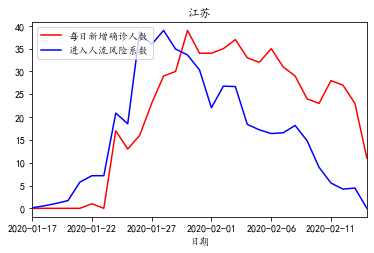

In [5]:
analyzer.plot_move_inc_corr('江苏', '2020-02-14', n=3, shift=0, window=1)

corr: 0.8652155101383823


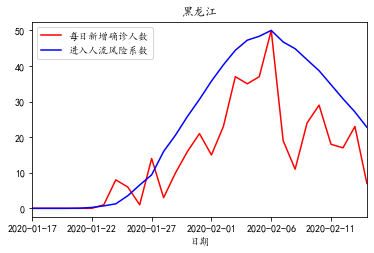

In [6]:
analyzer.plot_move_inc_corr('黑龙江', '2020-02-14')  # , n=3, shift=4, window=10

corr: 0.9517570075309312


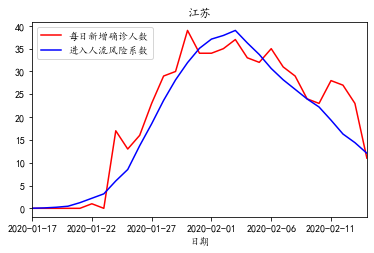

In [7]:
analyzer.plot_move_inc_corr('江苏', '2020-02-14')  # , n=3, shift=0, window=9

In [8]:
df = analyzer.df_move_inc_corr

In [9]:
data = []
for region in df.columns.levels[0]:
    df_region = df[region]
    shift_mean = df_region['shift'].mean()
    window_mean = df_region['window'].mean()
    data.append({'地区': region, 'shift均值': shift_mean, 'window均值': window_mean, '总均值': shift_mean + window_mean})
df_mean = pd.DataFrame(data).sort_values(['总均值', 'shift均值', 'window均值'])
df_mean = df_mean.set_index('地区')
df_mean = df_mean.T
df_mean

地区,上海,重庆,辽宁,福建,西藏,青海,云南,武汉,宁夏,浙江,陕西,广西,北京,广东,天津,海南,四川,甘肃,江苏,山东,吉林,山西,湖南,贵州,内蒙古,新疆,河北,安徽,河南,江西,黑龙江,湖北
shift均值,0.64,0.96,0.583333,0.875,1.176471,1.000000,1.333333,1.464286,2.125000,2.08,2.727273,2.00,1.72,2.12,2.12,1.166667,0.84,0.545455,0.833333,0.88,5.000000,1.375000,2.916667,4.416667,1.000000,2.227273,2.708333,2.625,3.20,4.000000,4.173913,4.928571
window均值,1.48,1.16,1.583333,1.375,1.294118,1.727273,2.083333,2.035714,1.708333,2.12,1.909091,2.75,3.36,3.12,3.20,4.250000,5.92,6.227273,6.000000,6.12,2.409091,6.208333,4.708333,3.208333,6.636364,5.863636,5.750000,6.375,7.12,6.833333,6.869565,6.392857
总均值,2.12,2.12,2.166667,2.250,2.470588,2.727273,3.416667,3.500000,3.833333,4.20,4.636364,4.75,5.08,5.24,5.32,5.416667,6.76,6.772727,6.833333,7.00,7.409091,7.583333,7.625000,7.625000,7.636364,8.090909,8.458333,9.000,10.32,10.833333,11.043478,11.321429


In [10]:
df[df_mean.columns]

上海                     重庆                     辽宁        \
                corr shift window      corr shift window      corr shift   
2020-01-17       NaN   NaN    NaN       NaN   NaN    NaN       NaN   NaN   
2020-01-18       NaN   NaN    NaN       NaN   NaN    NaN       NaN   NaN   
2020-01-19       NaN   NaN    NaN       NaN   NaN    NaN       NaN   NaN   
2020-01-20       NaN   NaN    NaN       NaN   NaN    NaN       NaN   NaN   
2020-01-21  1.000000   5.0    1.0  1.000000   5.0    1.0       NaN   NaN   
2020-01-22  0.802111   0.0    1.0  0.704406   0.0    1.0  1.000000   6.0   
2020-01-23  0.529492   0.0    1.0  0.527267   0.0    1.0  0.560986   0.0   
2020-01-24  0.964913   8.0    1.0  0.995293   8.0    3.0  0.979864   8.0   
2020-01-25  0.753642   0.0    1.0  0.785684   3.0    1.0  0.889797   0.0   
2020-01-26  0.726193   3.0    1.0  0.832815   3.0    1.0  0.861619   0.0   
2020-01-27  0.607477   0.0    1.0  0.773950   0.0    1.0  0.894477   0.0   
2020-01-28  0.635008   0.0    1.0  0.729145   0.0    1.0  0.888448   0.0   
2020-01-29  0.729349   0.0    1.0  0.712051   0.0    1.0  0.873815   0.0   
2020-01-30  0.807745   0.0    1.0  0.749961   0.0    1.0  0.844639   0.0   
2020-01-31  0.841123   0.0    1.0  0.764896   0.0    1.0  0.806661   0.0   
2020-02-01  0.852237   0.0    1.0  0.767285   0.0    1.0  0.808976   0.0   
2020-02-02  0.839113   0.0    2.0  0.791098   0.0    1.0  0.785464   0.0   
2020-02-03  0.824455   0.0    1.0  0.807023   0.0    1.0  0.779213   0.0   
2020-02-04  0.829045   0.0    2.0  0.806966   0.0    1.0  0.725195   0.0   
2020-02-05  0.832796   0.0    3.0  0.790622   0.0    1.0  0.725587   0.0   
2020-02-06  0.830578   0.0    3.0  0.767735   0.0    1.0  0.725822   0.0   
2020-02-07  0.819121   0.0    3.0  0.738435   0.0    1.0  0.698855   0.0   
2020-02-08  0.800631   0.0    3.0  0.732631   0.0    1.0  0.701162   0.0   
2020-02-09  0.731968   0.0    3.0  0.726904   0.0    1.0  0.706002   0.0   
2020-02-10  0.709531   0.0    1.0  0.723005   0.0    1.0  0.707821   0.0   
2020-02-11  0.714408   0.0    1.0  0.723017   0.0    1.0  0.706976   0.0   
2020-02-12  0.717866   0.0    1.0  0.590455   0.0    3.0  0.716577   0.0   
2020-02-13  0.724037   0.0    1.0  0.571718   2.0    1.0  0.720863   0.0   
2020-02-14  0.717565   0.0    1.0  0.543650   3.0    1.0  0.734908   0.0   

                         福建                     西藏                     青海  \
           window      corr shift window      corr shift window      corr   
2020-01-17    NaN       NaN   NaN    NaN       NaN   NaN    NaN       NaN   
2020-01-18    NaN       NaN   NaN    NaN       NaN   NaN    NaN       NaN   
2020-01-19    NaN       NaN   NaN    NaN       NaN   NaN    NaN       NaN   
2020-01-20    NaN       NaN   NaN    NaN       NaN   NaN    NaN       NaN   
2020-01-21    NaN       NaN   NaN    NaN       NaN   NaN    NaN       NaN   
2020-01-22    5.0  1.000000   6.0    1.0       NaN   NaN    NaN       NaN   
2020-01-23    1.0  0.551631   0.0    2.0       NaN   NaN    NaN       NaN   
2020-01-24    7.0  0.998281   8.0    1.0       NaN   NaN    NaN  1.000000   
2020-01-25    1.0  0.913579   3.0    1.0       NaN   NaN    NaN  0.599208   
2020-01-26    1.0  0.936392   2.0    9.0       NaN   NaN    NaN  0.945611   
2020-01-27    1.0  0.924175   2.0    1.0       NaN   NaN    NaN  0.920764   
2020-01-28    1.0  0.876620   0.0    1.0       NaN   NaN    NaN  0.643003   
2020-01-29    1.0  0.892319   0.0    1.0  0.921326   5.0    1.0  0.705112   
2020-01-30    1.0  0.896753   0.0    1.0  0.621678   5.0    1.0  0.587375   
2020-01-31    1.0  0.912734   0.0    1.0  0.456346   3.0    1.0  0.579366   
2020-02-01    1.0  0.914453   0.0    1.0  0.371339   3.0    1.0  0.601890   
2020-02-02    1.0  0.915710   0.0    1.0  0.283251   3.0    1.0  0.619379   
2020-02-03    1.0  0.915697   0.0    1.0  0.248009   1.0    1.0  0.635821   
2020-02-04    1.0  0.911485   0.0    1.0  0.235977   0.0    2.0  0.624033   
2020-02-05    1.0  0.908093   0.0    1.0  0.

In [11]:
df[df_mean.columns].to_excel('人流和新增相关性分析 {}.xlsx'.format(last_date))